# PI7 Onderzoeksrapport
#### Dajmen Graus en Bram Verheijen 

## Data Selectie/Preperation
Voor het verkrijgen van een passende dataset werden meerdere bronnen doorzocht met verzamelingen van verschillende datasets. Deze datasets werden langs de eisen vanuit de opdrachtomschrijving gelegd, waardoor uiteindlijk een dataset werd gekozen die gepast is voor de opdracht. De gekozen dataset heeft alleen één datatype, namelijk getallen. Echter bleek deze dataset zeer geschikt te zijn voor het gebruik met classification en regression. 

### Gekozen Dataset
De dataset die uiteindelijk werd gekozen voor deze opdracht, is een dataset over de kwaliteit van verschillende rode wijnen. De kwaliteit wordt bepaald op basis van 11 aspecten:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Uit deze aspecten komt uiteindelijk de "quality" feature. Deze feature legt vast wat de kwaliteit van een specifieke soort rode wijn is. De dataset bestaat uit 1600 records, welke genoeg zullen zijn om te gebruiken voor de train- en testdata. Deze dataset is [hier](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download) terug te vinden.

### Imports en inlezen data
In de onderstaande code is te zien hoe de dataset wordt ingelezen en welke libraries worden gebruikt.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.special import expit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('winequality-red.csv')


### Preperatie voor Logistic Regression en Classification
In de onderstaande code is te zien hoe een label wordt aangemaakt wat gebruikt kan worden voor classificatie en logistic regression. Dit wordt gedaan door middel van de "quality" feature te doorlezen en sorteren op hoge kwaliteit en lage kwaliteit. Dit wordt opgeslagen als een nieuwe feature, namelijk de "quality_range" feature. Aangezien het alleen de waardes 1 en 0 kan hebben, is het geschikt voor classificatie.

In [56]:
# Low en High quality wine set (0 for low, 1 for high), set in label 'quality_range'
bins = [0, 5, 10]

labels = [0, 1]

df_bins = df.copy()

df_bins['quality_range'] = pd.cut(x=df_bins['quality'], bins=bins, labels=labels)


## Uitwerkingen


### Multiple Linear Regression
Multiple Linear Regression is een statische methode die gebruikt wordt om de relatie tussen meerdere onafhankelijke variabelen en een afhankelijke variabele. Het is een verlenging van linear regression, waar maar een onafhankelijke variabele en maar een afhankelijke variabele aanwezig is. De relaties tussen de variabelen worden met behulp van een lineare formule. De formule heeft de volgende vorm:

Y = b0 + b1X1 + b2X2 + ... + bn*Xn

Waar Y de afhankelijke variabel is. X1, X2, ..., Xn zijn de onafhankelijke variabelen. b0, b1, b2, ...., bn zijn de coëfficiënten die gekoppeld zijn aan de variabelen. De coëfficiënten representeren de relatie tussen iedere onafhankelijke variabele en de afhankelijke variabele. 

#### Voorbeeld
In het geval van onze code, wordt multiple linear regression toegepast op onze gevonden dataset. Hierbij is de feature "quality" de afhankelijke variabele en zijn de rest van de features de onafhankelijke variabelen. Hierdoor worden alle coëfficiënten berekend, waarmee de formule kan worden opgesteld.

In de onderstaande code is te zien hoe allereerst de afhankelijke variabelen en onafhankelijke variabelen gesplitst worden. Daarnaast is te zien hoe er een train- en testdataset opgesteld wordt. 

Hierna is het zichtbaar hoe de multiple linear regression uitgewerkt wordt in Sklearn. Er wordt een model opgesteld wat getraind wordt met de traindata. Hierna kan gekeken worden naar hoe goed het model presteerd door verwachtingen uit te voeren over te testdata.

Daarnaast worden hier de intercept en de coëfficiënten geprint die berekend zijn. Hiermee kan de formule opgesteld worden.

In [57]:
#Multiple Linear Regression
y_lin = df['quality']
X_lin = df.drop('quality',axis=1)

X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.1, random_state=40)

#Sklearn solution
model_lin = LinearRegression()

model_lin.fit(X_lin_train, y_lin_train)

predictions = model_lin.predict(X_lin_test)

print("Intercept: \n", model_lin.intercept_)
print("Coefficients: \n", model_lin.coef_)


Intercept: 
 15.335718506836685
Coefficients: 
 [ 2.54597245e-02 -1.07706341e+00 -2.02785449e-01  1.38509688e-02
 -1.73613411e+00  3.62196555e-03 -2.99237597e-03 -1.12547406e+01
 -4.15741388e-01  8.43417688e-01  2.82638815e-01]


Hieronder is ook een uitwerking gemaakt met behulp van statsmodel.api. Deze werd ook uitgewerkt omdat het mogelijk was om een duidelijker overzicht terug te geven van de coëfficiënten en intercept. Dit is gedaan om een duidelijker overzicht te krijgen over de betreffende coeëfficiënten en intercept per feature.

In [58]:
#SM (statsmodel.api) solution
X_lin_train_sm = sm.add_constant(X_lin_train)

model_sm = sm.OLS(y_lin_train, X_lin_train_sm).fit()
predictions_sm = model_sm.predict(X_lin_train_sm)

print_model = model_sm.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     70.08
Date:                Thu, 05 Jan 2023   Prob (F-statistic):          1.78e-125
Time:                        14:09:18   Log-Likelihood:                -1421.5
No. Observations:                1439   AIC:                             2867.
Df Residuals:                    1427   BIC:                             2930.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.3357 

In het onderstaande stuk code wordt de R2-score, Mean Squared Error en Root Mean Squared Error berekend. De R2-score wordt berekent om aan te geven hoe goed het model presteert. Hoe dichter de R2-score bij 1 komt, hoe beter het model presteert. De Mean Squared Error en Root Mean Squared Error worden berekend om aan te geven hoe groot de afwijking is tussen de verwachte en de werkelijke waarde. Hoe lager deze waardes, hoe beter het model presteert.

In [59]:
#Predictions
y_lin_prediction = model_lin.predict(X_lin_test)

lin_score = r2_score(y_lin_test, y_lin_prediction)

print('R2 and Mean errors', '-'*35, 
      'R2-score   : {:.2f}'.format(lin_score), 
      'Mean Squared Error   : {:.2f}'.format(mean_squared_error(y_lin_test,y_lin_prediction)),
      'Root Mean Squared Error   : {:.2f}'.format(np.sqrt(mean_squared_error(y_lin_test,y_lin_prediction))), sep='\n')

R2 and Mean errors
-----------------------------------
R2-score   : 0.44
Mean Squared Error   : 0.37
Root Mean Squared Error   : 0.61


Hieronder is te zien hoe cross validation is uitgevoerd voor de Multiple Linear Regression. Er zijn hier 10 splits aangemaakt om een redelijk gemiddeld aan te kunnen tonen van hoe het model presteert.

In [60]:

#Cross validation for Multiple Linear Regression
cv = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_score_lin = cross_val_score(model_lin, X_lin, y_lin, scoring="r2", cv=cv, n_jobs=1)
print('R2 cross validation', '-'*35,
"Cross validation R2 scores:", cross_val_score_lin,
"Cross validation mean R2 score:  :  {:.2f}".format(cross_val_score_lin.mean()),sep='\n')

R2 cross validation
-----------------------------------
Cross validation R2 scores:
[0.42488409 0.38054278 0.23211503 0.33175818 0.34083778 0.20144075
 0.38588786 0.27871715 0.44967865 0.42050924]
Cross validation mean R2 score:  :  0.34


### Logistic Regression
Logistic Regression is een methode voor binaire classificatie dat gebruikt maakt van een logistieke formule om de kans op een mogelijkheid te voorspellen. De Logistieke formule neemt een input van 1 of meerdere onafhankelijke variabelen en koppelt dit aan een getal tussen 0 en 1. Dit representeert de kans op deze waarde. De coëfficiënten van de onafhankelijke variabelen zijn opgehaald via trainingsdata. Het model wat hiermee is opgesteld wordt getraint om de optimale coëfficiënten te gebruiken om een binaire waarde te voorspellen. Zodra het model getraind is kan het gebruikt worden om voorspellingen over nieuwe data uit te voeren. 

De formule voor Logistic Regression heeft de volgende vorm:

P = 1 / (1 + e^-(b0 + b1X1 + b2X2 + ... + bn*Xn))

Waar P de kans is dat afhankelijke variabele 1 is. X1, X2, ..., Xn zijn de onafhankelijke variabelen. b0, b1, b2, ...., bn zijn de coëfficiënten die gekoppeld zijn aan de variabelen. De coëfficiënten representeren de relatie tussen iedere onafhankelijke variabele en de afhankelijke variabele. e is de wiskunde constante die ongeveer 2,718 is.

#### Voorbeeld
In het geval van onze code, wordt logistic regression toegepast op onze gevonden dataset. Hierbij is de feature "quality_range" de afhankelijke variabele en zijn de rest van de features de onafhankelijke variabelen. Hierdoor worden alle coëfficiënten berekend, waarmee de formule kan worden opgesteld.

Hieronder is te zien hoe de binaire afhankelijke variabele gesplitst wordt van de onafhankelijke variabelen. Daarnaast wordt hier de data opgesplitst in de train- en testset.

In [61]:

#Set X and y, also split into train and test sets
X_log = df_bins[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y_log = df_bins['quality_range']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.1, random_state=40)

Hieronder is te zien hoe de logistic regression wordt uitgevoerd met behulp van Sklearn. Hier wordt gelijk de accuraatheid bepaald met de train- en testset.

In [62]:
#Logistic regression
model_lr = LogisticRegression(random_state=40, max_iter=1600)

model_lr.fit(X_log_train, y_log_train)

train_accuracy = model_lr.score(X_log_train, y_log_train)
test_accuracy = model_lr.score(X_log_test, y_log_test)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')


One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.74
Accuracy in Test  Group   : 0.79


Hieronder is te zien hoe cross validation is uitgevoerd voor de Logistic Regression. Er zijn hier 10 splits aangemaakt om een redelijk gemiddeld aan te kunnen tonen van hoe het model presteert. Dit is gedaan om te vergelijken met de gekozen split voor de logistic regression.

In [63]:
#Cross validation for Logistic Regression
cv = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_score_lr = cross_val_score(model_lr, X_log, y_log, scoring="accuracy", cv=cv, n_jobs=1)
print('Accuracy cross validation', '-'*35,
"Cross validation accuracy scores:", cross_val_score_lr,
"Cross validation mean accuracy score:  :  {:.2f}".format(cross_val_score_lr.mean()),sep='\n')

Accuracy cross validation
-----------------------------------
Cross validation accuracy scores:
[0.75       0.71875    0.7125     0.73125    0.75625    0.65
 0.78125    0.7        0.85625    0.77987421]
Cross validation mean accuracy score:  :  0.74


In het onderstaande stuk code is te zien hoe er een matrix wordt opgesteld om de accuraatheid van het model weer te geven. Hier is te zien hoe accuraat het model voorspeld en hoe het model voorspeld. Hier is te zien wat het model voorspelt tegenover de werkelijke waarde.

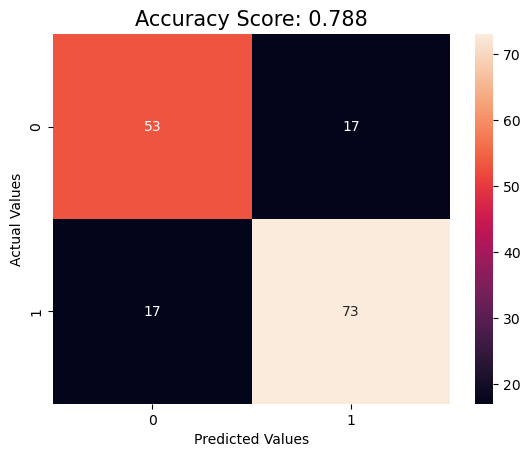

[[53 17]
 [17 73]]


In [64]:

log_predictions = model_lr.predict(X_log_test)

#confusion matrix
score_lr = round(accuracy_score(y_log_test, log_predictions), 3)
confusionMatrix_test = cm(y_log_test, log_predictions)
sns.heatmap(confusionMatrix_test, annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_lr), size = 15)
plt.show()

#Array confusion matrix
log_pred_test = model_lr.predict(X_log_test)
log_pred_train = model_lr.predict(X_log_train)

cm = cm(y_log_test, log_pred_test)
print(cm)

In het onderstaande stuk code wordt de ROC-curve berekend van de voorspellingen van het model. De ROC-curve geeft aan hoe accuraat het model voorspelt. Hoe dichter de curve bij de linkerbovenhoek ligt, hoe accurater het model voorspelt. Hoe dichter de curve bij de rechterbovenhoek ligt, hoe minder acuraat het model voorspelt. Dit doet het door de True Positive Rate (TPR) te vergelijken met de False Positive Rate (FPR). De TPR is de kans dat het model een positieve voorspelling doet en deze ook correct is. De FPR is de kans dat het model een positieve voorspelling doet en deze onjuist is.

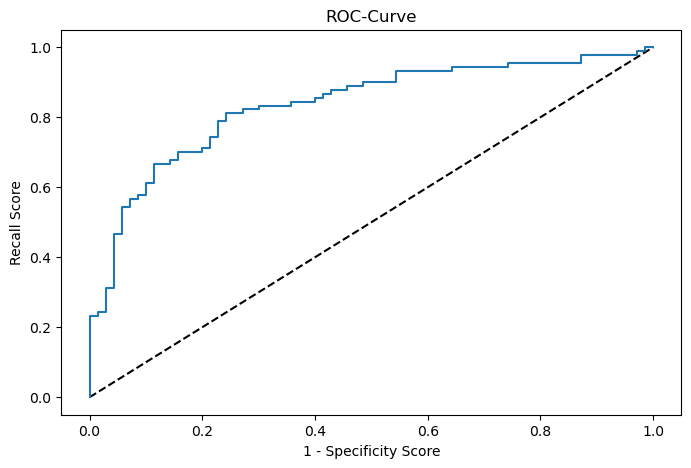

In [65]:
#ROC-curve

probs = model_lr.predict_proba(X_log_test)[:,1] #predict probabilities for the test data

fpr, tpr, thresholds =  roc_curve(y_log_test, probs) #Get ROC Curve

plt.figure(figsize=(8,5))
#Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('1 - Specificity Score')
plt.ylabel('Recall Score')
plt.title('ROC-Curve')
plt.show()


### Decision Tree
Decision Trees zijn een methode voor classificatie en regressie. Het is een methode die een beslissing neemt op basis van een aantal voorwaarden. Deze voorwaarden worden opgesteld door de data die gebruikt wordt om het model te trainen. Het model wordt getraint om de optimale voorwaarden te vinden om een beslissing te nemen. Zodra het model getraind is kan het gebruikt worden om voorspellingen over nieuwe data uit te voeren. Iedere node in de decision tree is een voorwaarde die de data moet voldoen om de volgende node te bereiken. De leaf nodes zijn de uiteindelijke beslissingen die het model neemt.

#### Voorbeeld
In het geval van onze code, wordt decision tree toegepast op onze gevonden dataset. Hierbij is de feature "quality_range" de afhankelijke variabele en zijn de rest van de features de onafhankelijke variabelen. Hierdoor worden alle voorwaarden berekend, waarmee de decision tree kan worden opgesteld.

Hieronder is te zien hoe de binaire afhankelijke variabele gesplitst wordt van de onafhankelijke variabelen. Daarnaast wordt hier de data opgesplitst in de train- en testset.

In [66]:
#Set X and y, also split into train and test sets
X_tree = df_bins[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']]
y_tree = df_bins['quality_range']

X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.1, random_state=40)

Hieronder is te zien hoe de decision tree wordt uitgevoerd met behulp van Sklearn. Hier wordt gelijk de accuraatheid berekend voor Gini index en entropy criteria met de train- en testset.

In [67]:
#Decision Tree
model_tree_gini = DecisionTreeClassifier(random_state=40, criterion='gini')

model_tree_entropy = DecisionTreeClassifier(random_state=40, criterion='entropy')

model_tree_gini.fit(X_tree_train, y_tree_train)
model_tree_entropy.fit(X_tree_train, y_tree_train)

train_accuracy_gini = model_tree_gini.score(X_tree_train, y_tree_train)
test_accuracy_gini = model_tree_gini.score(X_tree_test, y_tree_test)

train_accuracy_entropy = model_tree_entropy.score(X_tree_train, y_tree_train)
test_accuracy_entropy = model_tree_entropy.score(X_tree_test, y_tree_test)

print('Decision Tree Gini Criteria vs Entropy Criteria', '-'*35,
        'Accuracy in Test Gini Group   : {:.2f}'.format(test_accuracy_gini),
        'Accuracy in Test Entropy Group   : {:.2f}'.format(test_accuracy_entropy), sep='\n')

Decision Tree Gini Criteria vs Entropy Criteria
-----------------------------------
Accuracy in Test Gini Group   : 0.75
Accuracy in Test Entropy Group   : 0.77


Hieronder is te zien hoe cross validation is uitgevoerd voor de Decision Tree. Er zijn hier 10 splits aangemaakt om een redelijk gemiddeld aan te kunnen tonen van hoe het model presteert. Dit is gedaan om te vergelijken met de gekozen split voor de decision tree.

In [68]:
#Cross validation for Decision Tree
cv = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_score_tree_gini = cross_val_score(model_tree_gini, X_tree, y_tree, scoring="accuracy", cv=cv, n_jobs=1)
cross_val_score_tree_entropy = cross_val_score(model_tree_entropy, X_tree, y_tree, scoring="accuracy", cv=cv, n_jobs=1)

print('Accuracy cross validation', '-'*35,
"Cross validation accuracy scores gini:", cross_val_score_tree_gini,
"Cross validation mean accuracy score gini:  :  {:.2f}".format(cross_val_score_tree_gini.mean()),
"Cross validation accuracy scores entropy:", cross_val_score_tree_entropy,
"Cross validation mean accuracy score entropy:  :  {:.2f}".format(cross_val_score_tree_entropy.mean()),sep='\n')

Accuracy cross validation
-----------------------------------
Cross validation accuracy scores gini:
[0.80625    0.75       0.775      0.7625     0.75       0.7125
 0.8125     0.7875     0.83125    0.77987421]
Cross validation mean accuracy score gini:  :  0.78
Cross validation accuracy scores entropy:
[0.79375    0.76875    0.75625    0.70625    0.75625    0.6875
 0.84375    0.75       0.79375    0.81761006]
Cross validation mean accuracy score entropy:  :  0.77


Hieronder is te zien hoe een confusion matrix wordt opgesteld om de accuraatheid van het model weer te geven. Hier is te zien hoe accuraat het model voorspeld en hoe het model voorspeld. Hier is te zien wat het model voorspelt tegenover de werkelijke waarde.

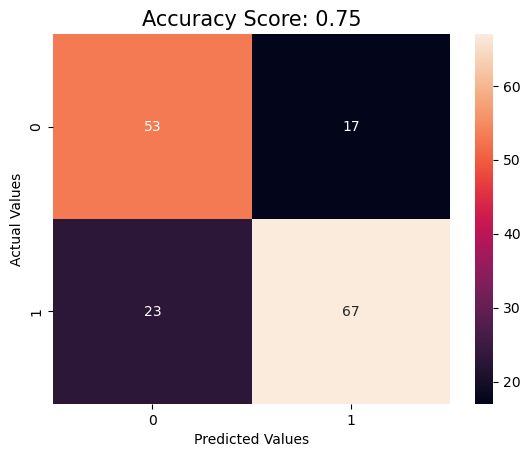

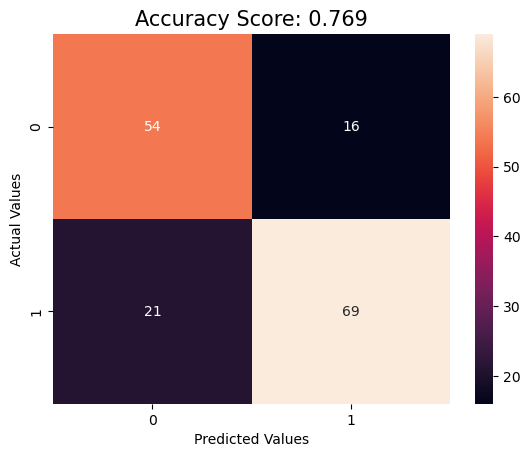

In [69]:
from sklearn.metrics import confusion_matrix as cm

#confusion matrix for Decision Tree Gini
tree_gini_predictions = model_tree_gini.predict(X_tree_test)

score_tree_gini = round(accuracy_score(y_tree_test, tree_gini_predictions), 3)
tree_pred_test = model_tree_gini.predict(X_tree_test)
tree_pred_train = model_tree_gini.predict(X_tree_train)

cm_gini = cm(y_tree_test, tree_pred_test)

#Gini confusion matrix with sns heatmap
sns.heatmap(cm_gini, annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_tree_gini), size = 15)
plt.show()

#confusion matrix for Decision Tree Entropy with sns heatmap
tree_entropy_predictions = model_tree_entropy.predict(X_tree_test)

score_tree_entropy = round(accuracy_score(y_tree_test, tree_entropy_predictions), 3)
tree_pred_test = model_tree_entropy.predict(X_tree_test)
tree_pred_train = model_tree_entropy.predict(X_tree_train)

cm_entropy = cm(y_tree_test, tree_pred_test)

#Entropy confusion matrix with sns heatmap
sns.heatmap(cm_entropy, annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_tree_entropy), size = 15)
plt.show()


### Random Forest
Random Forests is een methode voor classificatie en regression. Dit doet het door meerdere decision trees te combineren. Hierdoor wordt de voorspelling van het model verbeterd. De decision trees worden getraint op een random subset van de data. Hierdoor wordt voorkomen dat de decision trees te veel op elkaar lijken. Hierdoor wordt de voorspelling van het model verbeterd. De decision trees worden getraint op een random subset van de data. Hierdoor wordt voorkomen dat de decision trees te veel op elkaar lijken. Voor classificatie wordt de meest voorkomende beslissing genomen. Voor regression wordt de gemiddelde waarde van de beslissingen genomen.

#### Voorbeeld
In het geval van onze code, wordt random forest toegepast op onze gevonden dataset. Hierbij is de feature "quality_range" de afhankelijke variabele en zijn de rest van de features de onafhankelijke variabelen. Hierdoor worden alle voorwaarden berekend, waarmee de random forest kan worden opgesteld.

Hieronder is te zien hoe de binaire afhankelijke variabele gesplitst wordt van de onafhankelijke variabelen. Daarnaast wordt hier de data opgesplitst in de train- en testset.

In [70]:
#Set X and y, also split into train and test sets
X_forest = df_bins[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']]
y_forest = df_bins['quality_range']

X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y_forest, test_size=0.1, random_state=40)

Hieronder is te zien hoe de random forest wordt uitgevoerd met behulp van Sklearn. Hier wordt gelijk de accuraatheid berkend voor de Gini index en entropy criteria met de train- en testset.

In [71]:
#Random Forest
model_forest_gini = RandomForestClassifier(random_state=40, criterion='gini')

model_forest_entropy = RandomForestClassifier(random_state=40, criterion='entropy')

model_forest_gini.fit(X_forest_train, y_forest_train)
model_forest_entropy.fit(X_forest_train, y_forest_train)

train_accuracy_gini = model_forest_gini.score(X_forest_train, y_forest_train)
test_accuracy_gini = model_forest_gini.score(X_forest_test, y_forest_test)

train_accuracy_entropy = model_forest_entropy.score(X_forest_train, y_forest_train)
test_accuracy_entropy = model_forest_entropy.score(X_forest_test, y_forest_test)

print('Random Forest Gini Criteria vs Entropy Criteria', '-'*35,
        'Accuracy in Test Gini Group   : {:.2f}'.format(test_accuracy_gini),
        'Accuracy in Test Entropy Group   : {:.2f}'.format(test_accuracy_entropy), sep='\n')

Random Forest Gini Criteria vs Entropy Criteria
-----------------------------------
Accuracy in Test Gini Group   : 0.82
Accuracy in Test Entropy Group   : 0.82


Hieronder is te zien hoe cross validation is uitgevoerd voor de Random Forest. Er zijn hier 10 splits aangemaakt om een redelijk gemiddeld aan te kunnen tonen van hoe het model presteert. Dit is gedaan om te vergelijken met de gekozen split voor de random forest.

In [72]:
#Cross validation for Random Forest
cv = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_score_forest_gini = cross_val_score(model_forest_gini, X_forest, y_forest, scoring="accuracy", cv=cv, n_jobs=1)
cross_val_score_forest_entropy = cross_val_score(model_forest_entropy, X_forest, y_forest, scoring="accuracy", cv=cv, n_jobs=1)

print('Accuracy cross validation', '-'*35,
"Cross validation accuracy scores gini:", cross_val_score_forest_gini,
"Cross validation mean accuracy score gini:  :  {:.2f}".format(cross_val_score_forest_gini.mean()),
"Cross validation accuracy scores entropy:", cross_val_score_forest_entropy,
"Cross validation mean accuracy score entropy:  :  {:.2f}".format(cross_val_score_forest_entropy.mean()),sep='\n')

Accuracy cross validation
-----------------------------------
Cross validation accuracy scores gini:
[0.825      0.78125    0.825      0.83125    0.8375     0.7625
 0.85       0.80625    0.9        0.88050314]
Cross validation mean accuracy score gini:  :  0.83
Cross validation accuracy scores entropy:
[0.8125     0.7875     0.825      0.825      0.8375     0.775
 0.85625    0.8        0.875      0.88679245]
Cross validation mean accuracy score entropy:  :  0.83


Hieronder is te zien hoe een confusion matrix wordt opgesteld om de accuraatheid van het model weer te geven. Hier is te zien hoe accuraat het model voorspeld en hoe het model voorspeld. Hier is te zien wat het model voorspelt tegenover de werkelijke waarde.

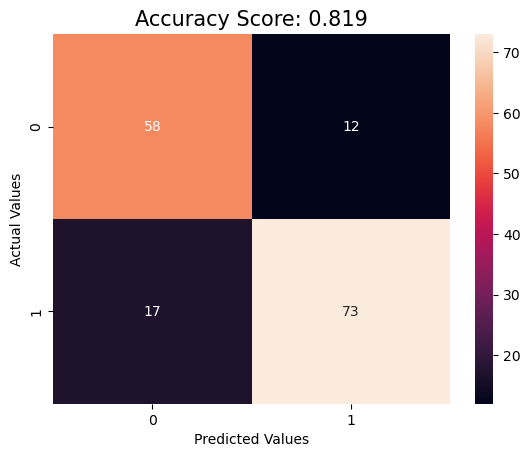

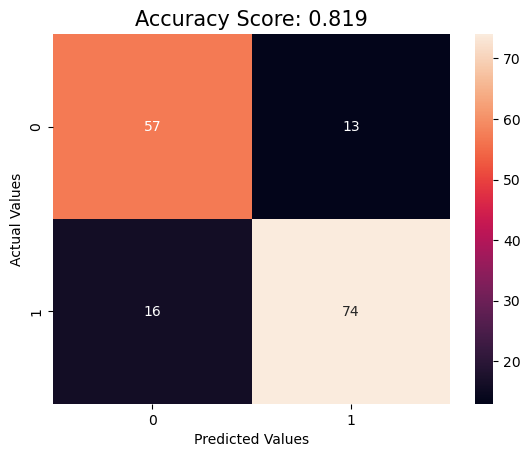

In [73]:
#confusion matrix for Random Forest Gini
forest_gini_predictions = model_forest_gini.predict(X_forest_test)

score_forest_gini = round(accuracy_score(y_forest_test, forest_gini_predictions), 3)

forest_pred_test = model_forest_gini.predict(X_forest_test)
forest_pred_train = model_forest_gini.predict(X_forest_train)

cm_gini = cm(y_forest_test, forest_pred_test)

#Gini confusion matrix with sns heatmap
sns.heatmap(cm_gini, annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_forest_gini), size = 15)
plt.show()

#confusion matrix for Random Forest Entropy with sns heatmap
forest_entropy_predictions = model_forest_entropy.predict(X_forest_test)

score_forest_entropy = round(accuracy_score(y_forest_test, forest_entropy_predictions), 3)

forest_pred_test = model_forest_entropy.predict(X_forest_test)
forest_pred_train = model_forest_entropy.predict(X_forest_train)

cm_entropy = cm(y_forest_test, forest_pred_test)

#Entropy confusion matrix with sns heatmap
sns.heatmap(cm_entropy, annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_forest_entropy), size = 15)
plt.show()

## Conclusie
### Multiple Linear Regression vs Logistic Regression
Logistic regression bleek uit deze opdracht accurater te zijn in het voorspellen van de kwaliteit van de rode wijnen. Dit komt doordat de kwaliteit van wijnen een balans van meerdere aspecten is. Het toevoegen of verminderen van een bepaald aspect betekend niet altijd dat de kwaliteit lineair veranderd. Dit is terug te zijn in de accuraatheidscores in beide modellen. 